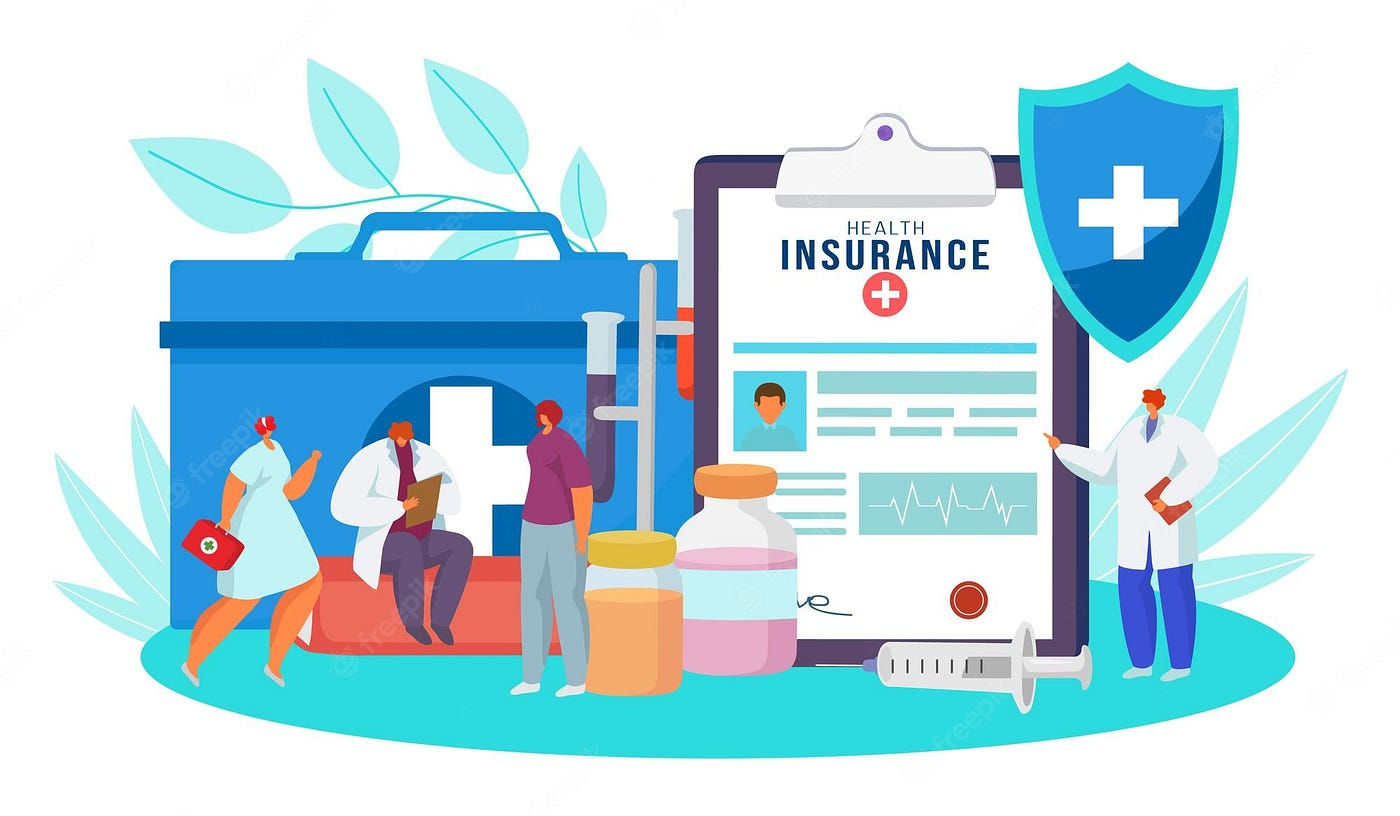

In this project, I will be performing a regression analysis on health insurance data to predict the insurance premium prices based on various parameters such as age, number of children, BMI, region, smoking status, and sex. The goal is to develop a model that accurately forecasts insurance costs, helping the insurance firm to better understand the factors influencing premium pricing. By identifying the impact of each parameter on the insurance price, the business can tailor its offerings and pricing strategies to meet the specific needs. This project is crucial for improving pricing accuracy, optimizing customer satisfaction, and increasing overall profitability for the insurance firm.

First we will import our required python libraries.

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import GridSearchCV

We will import our dataset.

In [ ]:
df=pd.read_csv("insurance.csv")
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1077,21,male,26.030,0,no,northeast,2102.26470
81,45,female,38.285,0,no,northeast,7935.29115
1063,36,male,28.595,3,no,northwest,6548.19505
395,46,male,19.855,0,no,northwest,7526.70645
608,28,male,26.980,2,no,northeast,4435.09420


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Let's know our dataset


The factors which affect the charges of medical insurance depends on various parameters.


*   Age: The age of the beneficiary
*   Sex: Sex of the the beneficiary

*   BMI: It is body mass index. In mathematical terms, the ratio of weight in kg to the square of height in meters.
*   Children: Number of children depends on the beneficiary.

*   Smoker: The smoking habit of beneficiary.
*   Region: The residential area of the beneficiary.







In [ ]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


***What this describes?***

1. Age, Bmi and Children have either no or negligble difference in their mean and median, thus they may have normal distribution and no outliers.
2. While Charges have difference between mean and median.
3. All four columns are equal in count, thus no null values exist between them.
4. We have wide range of people's data from young adult to senior adult.

# Data Preprocessing

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1337, 7)

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Visualisation

 **Univariate Analysis**

Text(0.5, 1.0, 'Distribution of Charges')

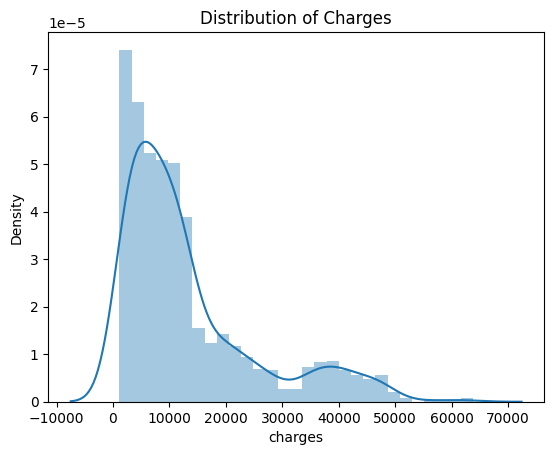

In [ ]:
sb.distplot(df['charges'])
plt.title("Distribution of Charges")

We can infer from the above plot that charges do not follow normal distribution. It shows positive skewness. Also, people are generally more charged in the range of slightly more than zero to somewhere around 10,000 and with the increase in charges, density decreases.

Text(0.5, 1.0, 'Distribution of Region')

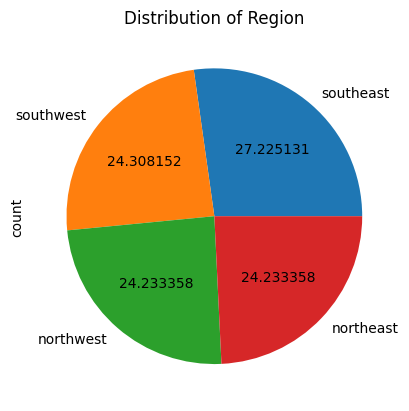

In [ ]:
df['region'].value_counts().plot(kind='pie',autopct="%2f")
plt.title("Distribution of Region")

The pie plot shows that insurance holders belong to all three regions i.e. southwest, northwest and northeast almost equal in count but southeast region has more insurance holders. Thus, we can target southeast region people as it is high chance that their neighbhor also holding the same.

Text(0.5, 1.0, 'Distribution of Smoker')

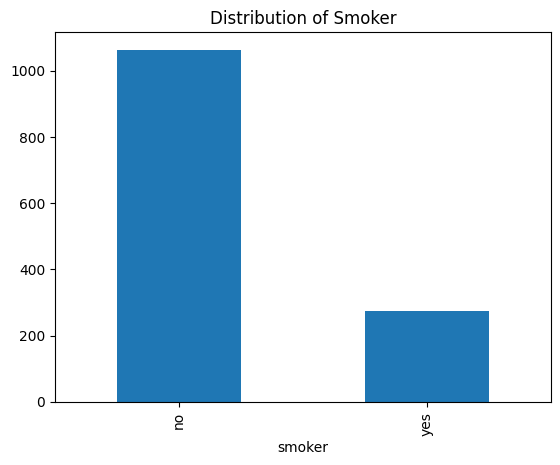

In [ ]:
df['smoker'].value_counts().plot(kind='bar')
plt.title("Distribution of Smoker")

From the graph, we can interpret that people who do not smoke holds the insurance while the number is less of the smokers.

Text(0.5, 1.0, 'Distribution of Children')

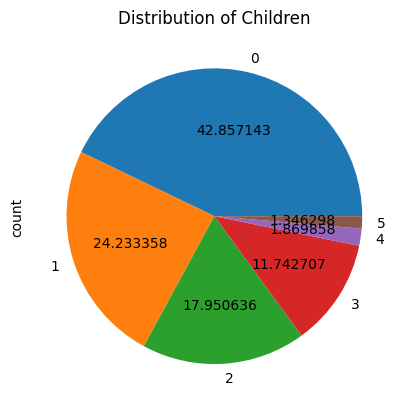

In [ ]:
df['children'].value_counts().plot(kind='pie',autopct='%2f')
plt.title("Distribution of Children")

From this pie chart, we can see that people with less number of children are more likely to take insurance. As number of children increases, proportion decreases.

Text(0.5, 1.0, 'Distribution of BMI')

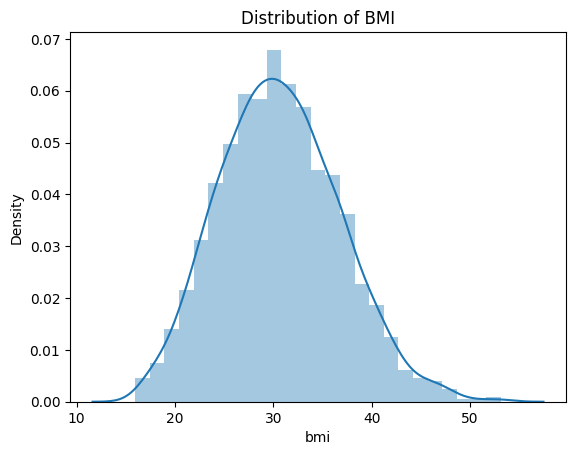

In [ ]:
sb.distplot(df['bmi'])
plt.title("Distribution of BMI")

The above chart describes us that Bmi follows normal distribution and the distribution is unimodal. It ranges somewhere around 15 to 60

Text(0.5, 1.0, 'Distribution of Sex')

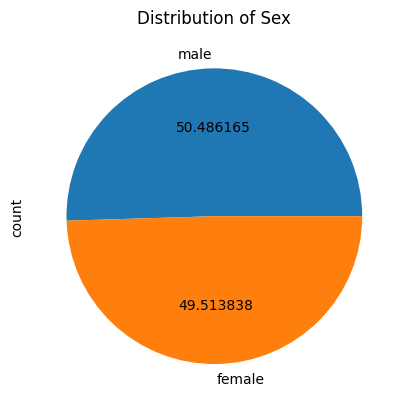

In [ ]:
df['sex'].value_counts().plot(kind='pie',autopct="%2f")
plt.title("Distribution of Sex")

Our dataset has equal number of males and females. Thus it can be seen that insurance holding does not have any prefernce for the particular gender.

Text(0.5, 1.0, 'Density of Age')

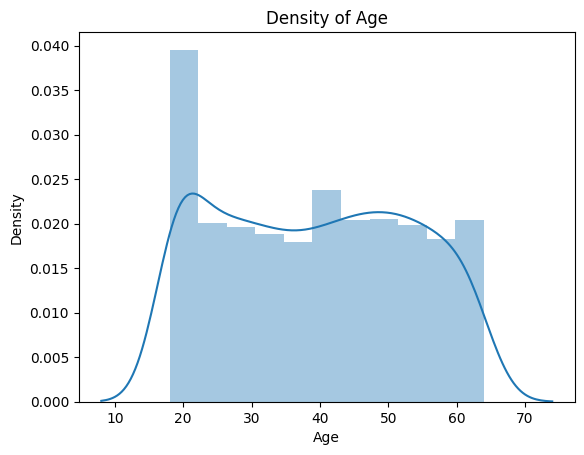

In [ ]:
sb.distplot(x=df['age'])
plt.xlabel("Age")
plt.title("Density of Age")

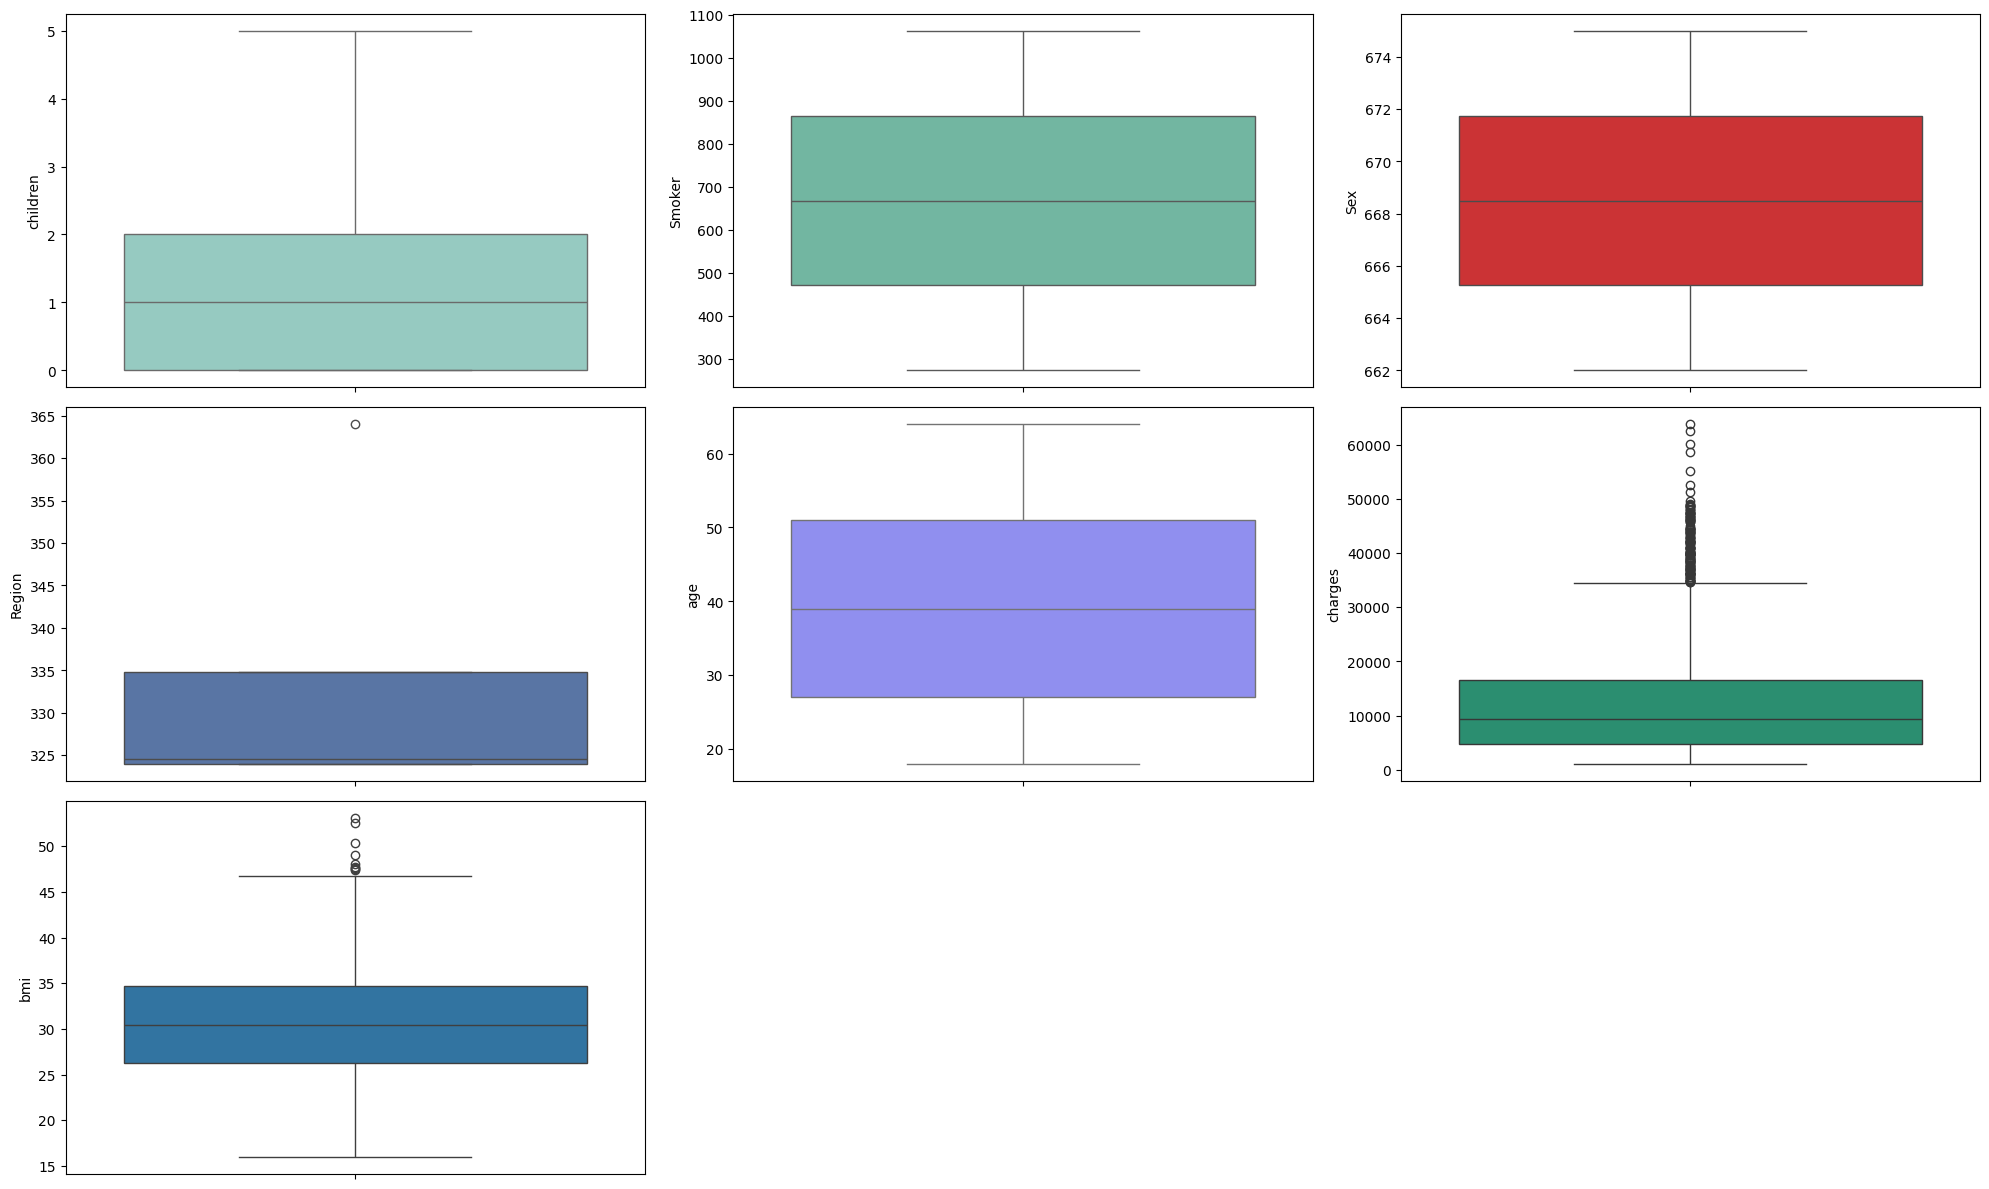

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(331)
sb.boxplot(df['children'],palette='Set3')
plt.subplot(332)
sb.boxplot(df['smoker'].value_counts(),palette='Set2')
plt.ylabel("Smoker")
plt.subplot(333)
sb.boxplot(df['sex'].value_counts(),palette='Set1')
plt.ylabel("Sex")
plt.subplot(334)
sb.boxplot(df['region'].value_counts(),palette='deep')
plt.ylabel("Region")
plt.subplot(335)
sb.boxplot(df['age'],palette='cool')
plt.subplot(336)
sb.boxplot(df['charges'],palette='Dark2')
plt.subplot(337)
sb.boxplot(df['bmi'])
plt.tight_layout()

These boxplots help to know about the outliers and as we can see charges column has so many outliers while bmi has in less number. Rest of the attributes do not show any significant number of outliers.

Bivariate Analysis

Text(0.5, 1.0, 'Sex Vs Charges with impact of Children')

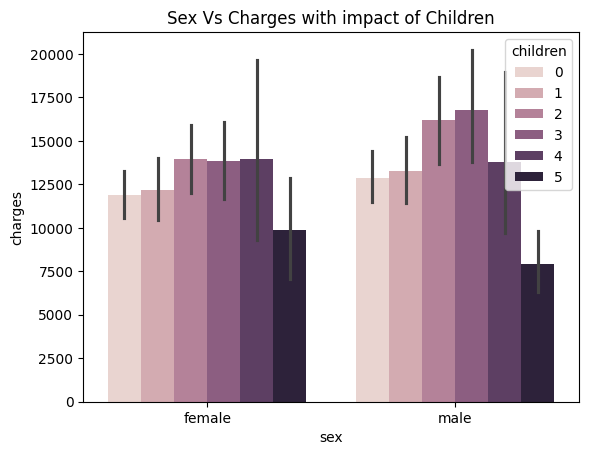

In [ ]:
sb.barplot(x=df['sex'],y=df['charges'],hue=df['children'])
plt.title("Sex Vs Charges with impact of Children")

1. This plot tells us that insurance holders having different number of children are charged differently and also for the same number of children, the gender of the holder may differ the charge.
2. For five children which is maximum, charges reduces for both male and females.

Text(0.5, 1.0, 'Sex Vs Charges with impact of Smoker')

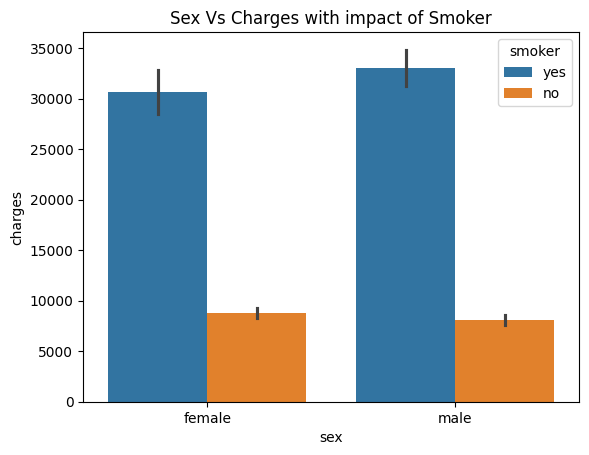

In [ ]:
sb.barplot(x=df['sex'],y=df['charges'],hue=df['smoker'])
plt.title("Sex Vs Charges with impact of Smoker")

Charges of insurance are high for male smokers while for female smokers, it is less. Although for non-smokers, charges remain insignificantly different for any gender.

Text(0.5, 1.0, 'Sex Vs CHarges with impact of Region')

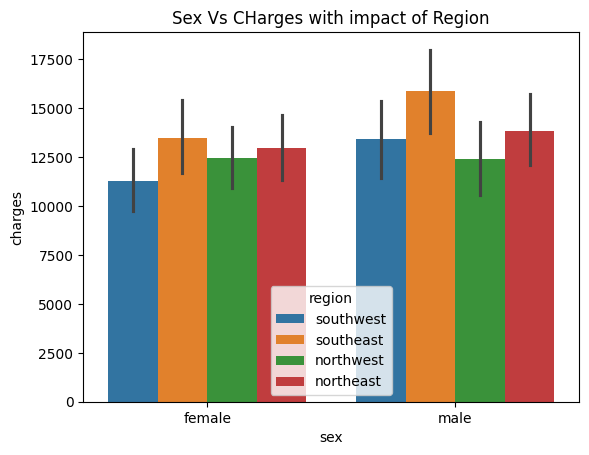

In [ ]:
sb.barplot(x=df['sex'],y=df['charges'],hue=df['region'])
plt.title("Sex Vs CHarges with impact of Region")

1. Males in Southeast region are charged higher than any of the other regions where males live.
2. Charges for females are less in comparison of males irrespective of any region.
3. Females are charged less living in Southwest region.


Text(0.5, 1.0, 'Age Vs Smoker')

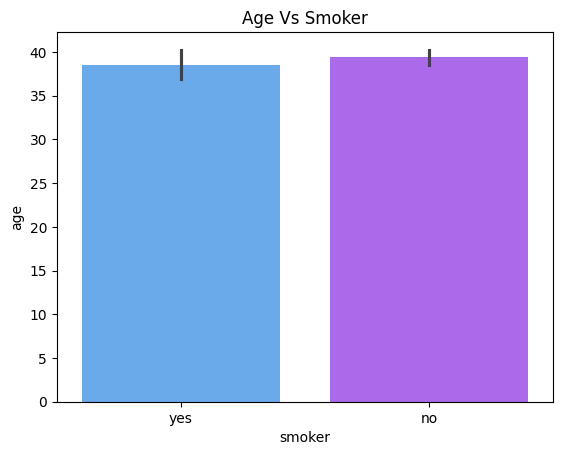

In [ ]:
sb.barplot(y=df['age'],x=df['smoker'],palette='cool')
plt.title("Age Vs Smoker")

This barplot represents that those people who smoke are generally range from 35 to 40 years.

Text(0.5, 1.0, 'Age Vs Children with impact of Sex')

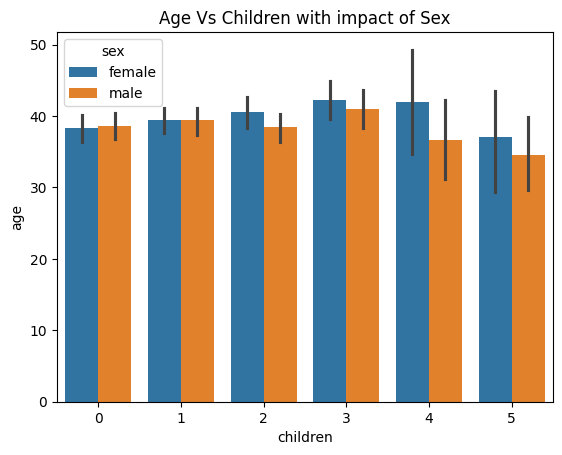

In [ ]:
sb.barplot(x=df['children'],y=df['age'],hue=df['sex'])
plt.title("Age Vs Children with impact of Sex")

We can infer that people having children range from 30 to 40 years who are insurance holders irrespective of the gender.

Text(0.5, 1.0, 'Region Vs Charges')

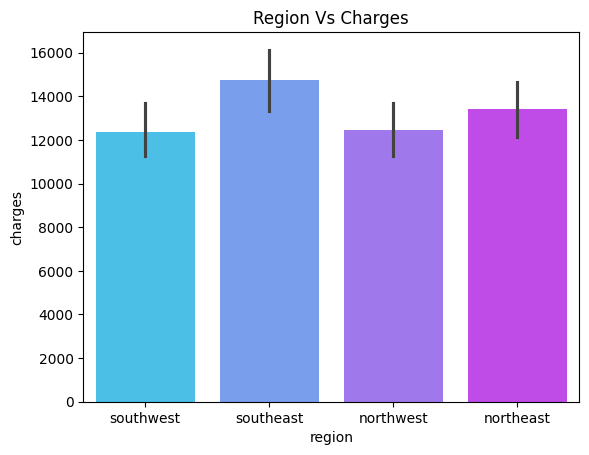

In [ ]:
sb.barplot(x=df['region'],y=df['charges'],palette='cool')
plt.title("Region Vs Charges")

Charges are highest in the Southeast region after northeast region  and lowest in SouthWest region. With little difference, northwest region is little costlier than southwest.

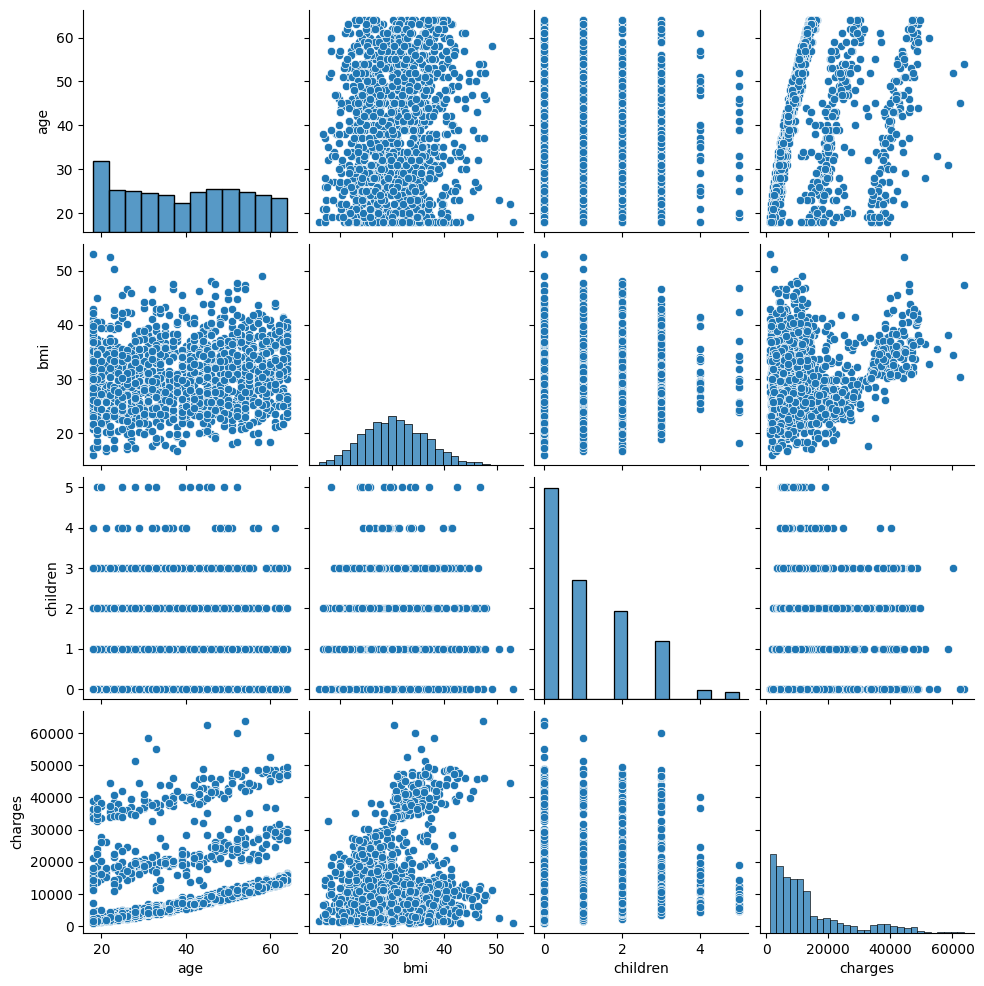

In [ ]:
sb.pairplot(df)

From the pairplot, we can infer following points which are charges at different ages are different. Also, Bmi and age have no correlation.

# Feature Engineering

### Outlier Detection
We will remove outliers from charges using Winsorisation technique as shown by boxplot during EDA.

In [ ]:
percentile25 = df['charges'].quantile(0.25)
percentile75 = df['charges'].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile75 - 1.5 * iqr

df['charges_new'] = np.where(df['charges'] >= upper_limit, upper_limit,
                         np.where(df['charges'] <= lower_limit, lower_limit, df['charges']))

Text(0.5, 1.0, 'Without Outliers')

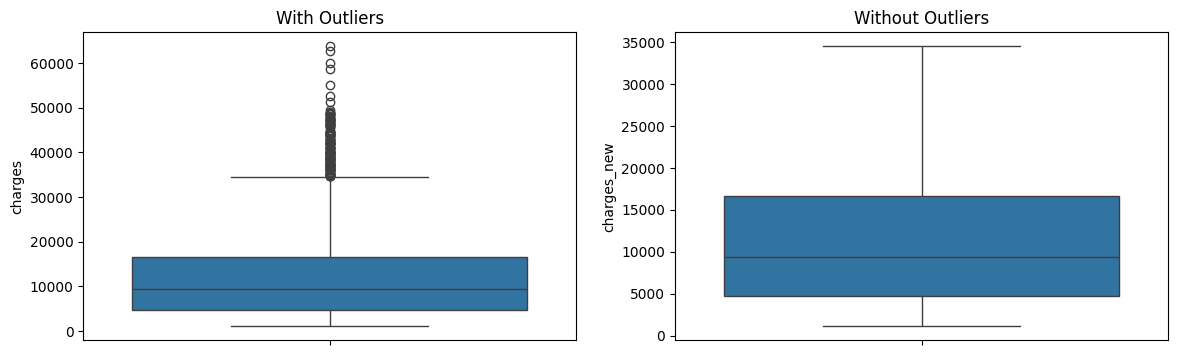

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sb.boxplot(df['charges'])
plt.title("With Outliers")
plt.subplot(122)
sb.boxplot(df['charges_new'])
plt.title("Without Outliers")

In [ ]:
df.drop(['charges'],axis=1,inplace=True)

In [ ]:
df.rename(columns={'charges_new':'charges'},inplace=True)

Encoding age into categories:

Young Adult: [15,30) years                                                  
Senior Adult: [30,45) years                                   
Aged : above 45 years



Text(0.5, 1.0, 'Distribution of different age groups')

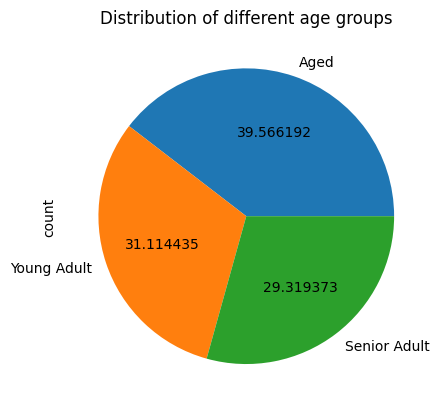

In [ ]:
df['age_cat']=np.nan
a=[df]
for col in a:
  col.loc[(col['age']>=15) & (col['age']<30),'age_cat']="Young Adult"
  col.loc[(col['age']>=30) & (col['age']<45),'age_cat']="Senior Adult"
  col.loc[(col['age']>=45),'age_cat']="Aged"
df
df['age_cat'].value_counts().plot(kind='pie',autopct='%2f')
plt.title("Distribution of different age groups")

We have aged people more in our dataset with 39% approximately while young adult are 31% along with senior adult who are 29% of the whole dataset.

Text(0.5, 1.0, 'Age_cat Vs Charges with impact of Sex')

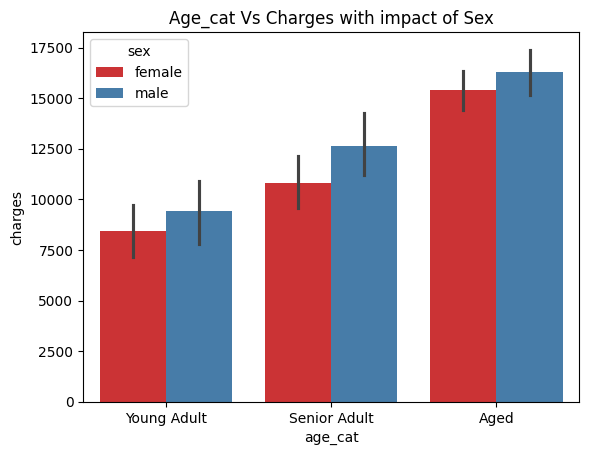

In [ ]:
sb.barplot(x=df['age_cat'],y=df['charges'],hue=df['sex'],palette='Set1')
plt.title("Age_cat Vs Charges with impact of Sex")

1. In every age category, females are charged less.
2. Young adult are charged less following to senior adult then aged people.

Extracting BMI into categories according to WHO                             
Below 18.5: Underweight                                                     
18.5-24.9: Normal Weight                                                    
25.0-29.9: Pre-obesity                                                      
Above 30.0: Obese

Text(0.5, 1.0, 'Distribution of Bmi_cat')

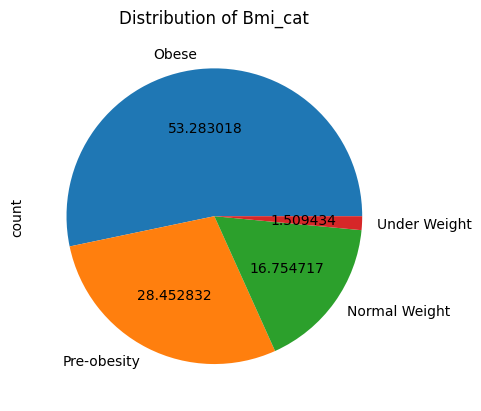

In [ ]:
df['bmi_cat']=np.nan
b=[df]
for col in b:
  col.loc[(col['bmi']<18.5),'bmi_cat']="Under Weight"
  col.loc[(col['bmi']>=18.5)&(col['bmi']<=24.9),'bmi_cat']="Normal Weight"
  col.loc[(col['bmi']>=25.0)&(col['bmi']<=29.9),'bmi_cat']="Pre-obesity"
  col.loc[(col['bmi']>=30),'bmi_cat']="Obese"
df['bmi_cat'].value_counts().plot(kind='pie',autopct="%2f")
plt.title("Distribution of Bmi_cat")

We have more than half i.e. 53% of the dataset of obese people and for rest part, we have people in the descending order i.e. Pre-obesity people, normal weight and under weight.

Text(0.5, 1.0, 'Bmi_cat Vs Charges with impact of Smoker')

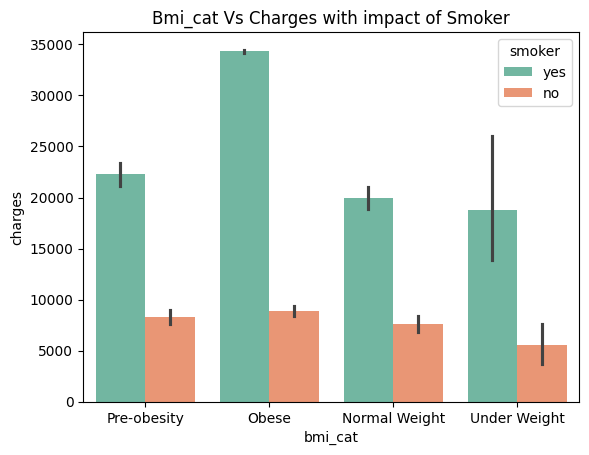

In [ ]:
sb.barplot(x=df['bmi_cat'],y=df['charges'],hue=df['smoker'],palette='Set2')
plt.title("Bmi_cat Vs Charges with impact of Smoker")

Non-smokers are charged less belonging to any bmi category. Though among smokers, obese people are charged high following after Pre-Obesity, Normal Weight and then underweight.

# Data Conclusion

1. Males beneficiary are charged higher than females especially having three children.
2. Females and males beneficiary with five children are charged less.
3. The beneficiary living in southeast are charged the most while southwest residentials are charged the least.
4. Non-smokers are taking up insurance more than smokers.
5. Smokers are charged higher than non-smokers.
6. People with no children are taking up insurance more than others.
7. Aged and Young Adult are more attentive towards taking up the insurances.
8. Obese people are readily taking up insurances while underweight people are negelectant towards insurances.


# Predictive Analysis

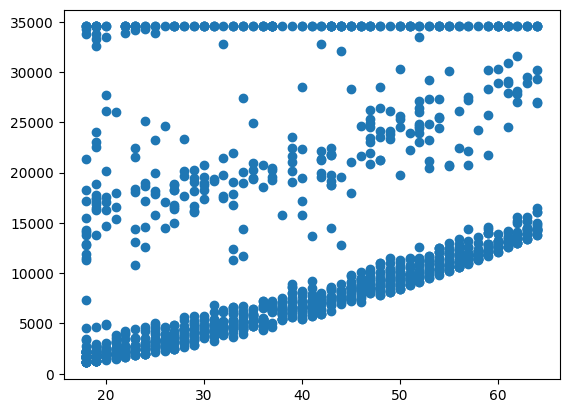

In [ ]:
plt.scatter(df['age'],df['charges'])

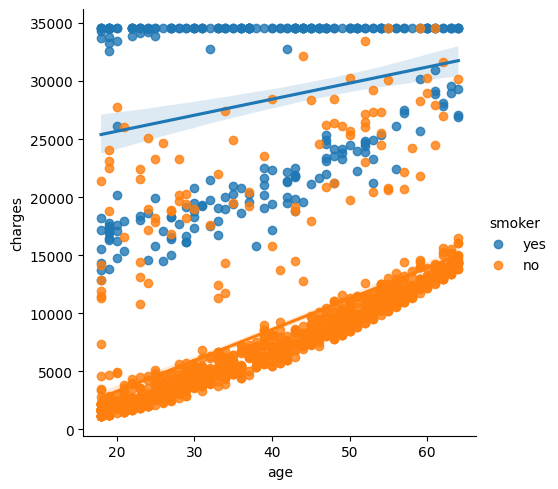

In [ ]:
sb.lmplot(x='age',y='charges',data=df,hue='smoker')

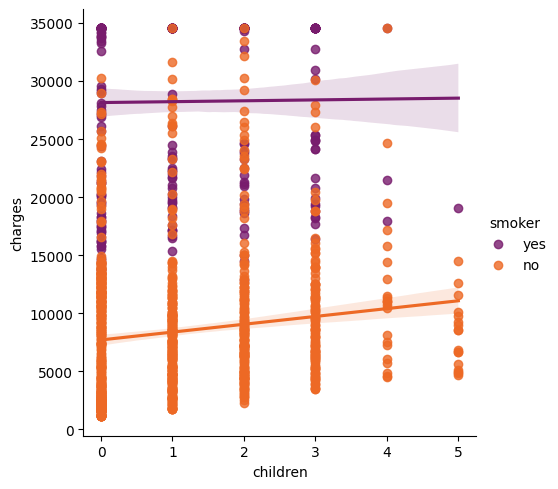

In [ ]:
sb.lmplot(x='children',y='charges',data=df,hue='smoker',palette='inferno')

Splitting the data for train and test data set

In [ ]:
df.drop(['age_cat','bmi_cat'],axis=1,inplace=True)

In [ ]:
df = pd.get_dummies(df, drop_first=True).astype(int)

In [ ]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,1,0,1,0,0
1334,18,31,0,2205,0,0,0,0,0
1335,18,36,0,1629,0,0,0,1,0
1336,21,25,0,2007,0,0,0,0,1


<Axes: >

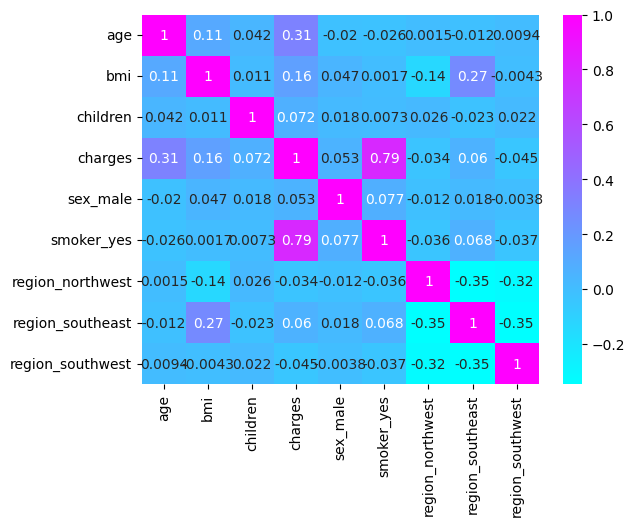

In [ ]:
sb.heatmap(df.corr(),annot=True,cmap='cool')

Interpretation of the heatmap:


1. Smokers and charges are highly positively correlated with each other.
2. Region is less correlated with age, sex and smoker.
3. Each attribute is perfectly correlated with itself.
4. Smoker is less correlated with region, bmi and children.
5. Rest of the features are related to each other with slight correlation.

In [ ]:
x=df.drop(['charges'],axis=1)
y_ch=df['charges']

In [ ]:
trf=FunctionTransformer(func=np.log1p)
y=trf.transform(y_ch)

Text(0.5, 1.0, 'After log transformation')

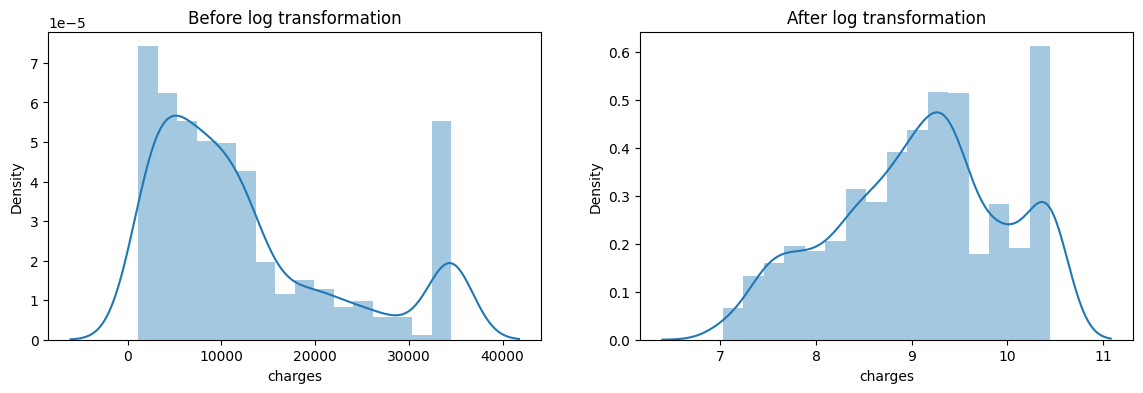

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sb.distplot(y_ch)
plt.title("Before log transformation")

plt.subplot(122)
sb.distplot(y)
plt.title("After log transformation")

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
x_train,x_test,y_train,y_test=tts(x,y,shuffle=True,random_state=42,test_size=0.2)

In [ ]:
print("The shape of x train set", x_train.shape)
print("The shape of y train set",y_train.shape)
print("The shape of x test set",x_test.shape)
print("The shape of y test set",y_test.shape)

The shape of x train set (1069, 8)
The shape of y train set (1069,)
The shape of x test set (268, 8)
The shape of y test set (268,)


In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

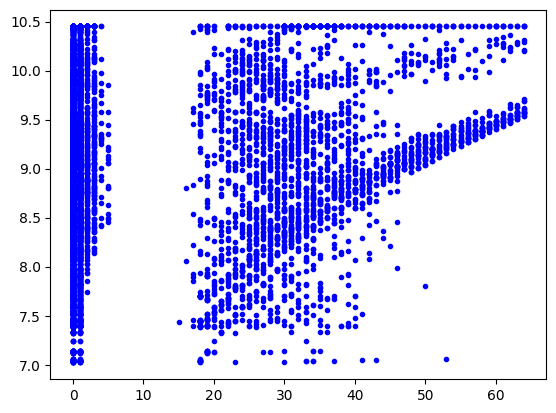

In [ ]:
plt.plot(x,y,'b.')

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
from sklearn.model_selection import cross_val_score, cross_validate
result=cross_validate(lr,x,y,cv=5,return_train_score=True,scoring='r2')
result

{'fit_time': array([0.0047102 , 0.00466514, 0.00425386, 0.00396228, 0.00469518]),
 'score_time': array([0.00239801, 0.00199723, 0.00201654, 0.0027411 , 0.00345922]),
 'test_score': array([0.78144767, 0.66503939, 0.81841891, 0.75462814, 0.70867941]),
 'train_score': array([0.74059932, 0.77058633, 0.73280879, 0.74800356, 0.75873929])}

In [ ]:
lr.coef_

array([ 0.46741181,  0.0642758 ,  0.1162568 , -0.03994626,  0.58075379,
       -0.01727234, -0.05598705, -0.04282579])

In [ ]:
lr.intercept_

9.074462301734728

In [ ]:
train_score=result['train_score'].mean()*100
train_accuracy=print("Training Accuracy is",train_score,"%")
test_score=result['test_score'].mean()*100
test_accuracy=print("Testing Accuracy is",test_score,"%")

Training Accuracy is 75.01474606614038 %
Testing Accuracy is 74.56427048830783 %


This means the dataset does not has overfitting.

In [ ]:
from sklearn.metrics import r2_score
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
lr_score=r2_score(y_test,y_pred_lr)*100
lr_score

80.905121602011

In [ ]:
lr_mae=mean_absolute_error(y_test,y_pred_lr)
lr_mae

0.2631547986283463

In [ ]:
lr_rmse=np.sqrt(mean_squared_error(y_test,y_pred_lr))
lr_rmse

0.40028758000235387

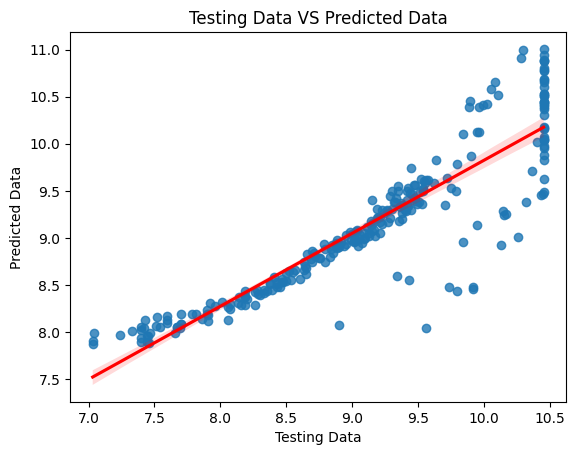

In [ ]:
predicted_data1=lr.predict(x_test)
sb.regplot(x=y_test,y=predicted_data1,line_kws={'color':'red'})
plt.title("Testing Data VS Predicted Data")
plt.xlabel("Testing Data")
plt.ylabel("Predicted Data")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
x_train_poly=poly.fit_transform(x_train)
x_test_poly=poly.transform(x_test)

In [ ]:
print(x_train)
print(x_train_poly[0])

[[-1.1576804  -0.99651264 -0.90790804 ... -0.57266946 -0.60581158
  -0.57410974]
 [-1.30061876 -0.83173739  0.7669042  ... -0.57266946 -0.60581158
  -0.57410974]
 [ 0.91492586  1.14556565  0.7669042  ...  1.74620801 -0.60581158
  -0.57410974]
 ...
 [-1.37208794 -1.32606315 -0.07050192 ... -0.57266946 -0.60581158
   1.74182728]
 [-0.08564268 -0.33741163  1.60431032 ... -0.57266946 -0.60581158
   1.74182728]
 [-0.30005022  0.81601515  0.7669042  ... -0.57266946  1.65067825
  -0.57410974]]
[-1.1576804  -0.99651264 -0.90790804  0.97140947 -0.50029231 -0.57266946
 -0.60581158 -0.57410974  1.34022391  1.15364315  1.05106734 -1.12458171
  0.5791786   0.66296821  0.70133619  0.66463559  0.99303744  0.90474184
 -0.96802182  0.49854761  0.57067236  0.6036989   0.57210761  0.82429701
 -0.88195047  0.45421941  0.51993121  0.55002121  0.52123885  0.94363636
 -0.48598869 -0.55629654 -0.58849111 -0.55769564  0.2502924   0.28650213
  0.30308288  0.28722269  0.32795031  0.34692979  0.32877511  0.367007

In [ ]:
lr.fit(x_train_poly,y_train)
y_pred_poly=lr.predict(x_test_poly)

poly_score=r2_score(y_test,y_pred_poly)*100
poly_score

87.63424900418121

In [ ]:
poly_mae=mean_absolute_error(y_test,y_pred_poly)
poly_mae

0.19558646025791218

In [ ]:
poly_rmse=np.sqrt(mean_squared_error(y_test,y_pred_poly))
poly_rmse

0.32212461699161066

In [ ]:
from sklearn.linear_model import Ridge
r = Ridge(alpha=0.5)
r.fit(x_train, y_train)
y_pred_r=r.predict(x_test)

In [ ]:
r_score=r2_score(y_test,y_pred_r)*100
r_score

80.90167473828174

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
rf=RandomForestRegressor(oob_score=True)
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)
rf.oob_score_

0.7714844427499924

In [ ]:
rf_score=r2_score(y_test,prediction)*100
rf_score

82.62033571720724

In [ ]:
rf_mae=mean_absolute_error(y_test,prediction)
rf_mae

0.1935812205796621

In [ ]:
rf_rmse=np.sqrt(mean_squared_error(y_test,prediction))
rf_rmse

0.38188654591647103

In [ ]:
result1=cross_validate(rf,x,y,cv=5,return_train_score=True,scoring='r2')
result1

{'fit_time': array([0.40519285, 0.39124489, 0.3962338 , 0.37663412, 0.38696909]),
 'score_time': array([0.01132035, 0.01073623, 0.01171279, 0.01138234, 0.01029253]),
 'test_score': array([0.83258812, 0.67953394, 0.86351761, 0.80893615, 0.76626352]),
 'train_score': array([0.96790316, 0.97434383, 0.96173229, 0.96401903, 0.96618839])}

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region', 'feature7', 'feature8']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

1.age(0.410980)
2.smoker(0.406234)
3.sex(0.078702)
4.bmi(0.055455)
5.children(0.015268)
6.region(0.012482)
7.feature7(0.012049)
8.feature8(0.008831)


In [ ]:
lr.coef_

array([ 4.55600275e-01,  5.93529907e-02,  1.40889178e-01, -5.92063431e+10,
       -8.40640948e+11, -5.01539047e+12, -7.05237197e+12, -3.30292260e+12,
       -2.51693302e-02, -1.51895060e-02, -7.51621302e-02,  2.36545653e-02,
       -1.97662864e-01,  1.58805354e-02,  4.89175746e-02,  4.77164160e-02,
       -2.23867969e-02,  1.90962862e-03,  1.31735001e-02,  9.21483848e-02,
       -1.41901752e-02, -2.95984706e-02, -1.09825298e-02, -2.06490851e-02,
        1.40046215e-03, -6.17870968e-02,  4.67867083e-03, -8.86598237e-03,
       -1.87203708e-02, -1.02040263e+12,  1.82394721e-02,  1.26434712e-02,
        1.17236872e-03,  3.35790316e-03,  5.60973641e+11,  3.08284479e-03,
        1.06798087e-02,  3.33947770e-02,  3.35766904e+12, -2.28715209e+12,
        5.40918926e+11,  2.15606508e+12, -6.07861018e+12, -5.97765229e+10])

<BarContainer object of 8 artists>

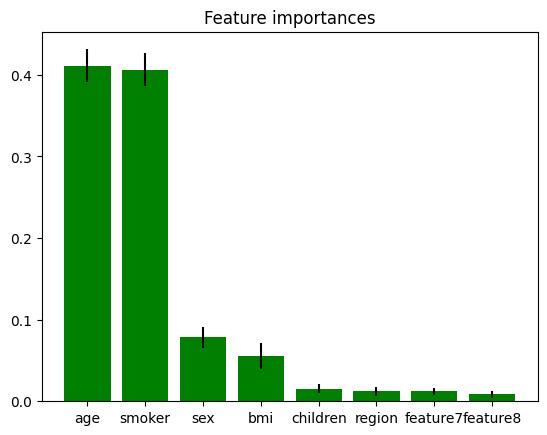

In [ ]:
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="g", yerr=std[indices], align="center")

We have tried to improve accuracy score by removing unimportant columns but accuracy score has no significant difference and if we try to remove more columns then accuracy score will fall down.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
estimators=[('lr',lr),('dt',dt),('rf',rf)]
for estimator in estimators:
  z=cross_val_score(estimator[1],x_train,y_train,cv=10,scoring='r2')
  print(np.round(z.mean()*100,2))
from sklearn.ensemble import VotingRegressor
vc=VotingRegressor(estimators=estimators)
c=cross_val_score(vc,x,y,cv=10,scoring='r2')
vc_score=np.round(np.mean(c)*100,2)
print("Voting Regressor's r2 score is",np.round(np.mean(c)*100,2))

72.84
52.5
76.91
Voting Regressor's r2 score is 78.93


In [ ]:
from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor(base_estimator=RandomForestRegressor(),
                      n_estimators=40,
                      bootstrap=True,
                      random_state=42)
bag.fit(x_train,y_train)
y_pred_bag=bag.predict(x_test)
bag_score=r2_score(y_test,y_pred_bag)*100
bag_score

84.92686260725118

# Hyperparameter Tuning
We will do tuning of hyperparameters of Random forest model using GridSearchCV as the size of dataset is small. So, GridSeaarchCV can perform better.

In [ ]:
n_estimators=[20,60,80,100,120]
max_depth=[2,3,None]
max_features=['auto','sqrt']
max_samples=[0.5,0.75,1.0]

In [ ]:
param_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'max_samples':max_samples}

In [ ]:
rf_grid=GridSearchCV(estimator=rf,
                     param_grid=param_grid,
                     cv=5,
                     n_jobs=-1,
                     verbose=2)

In [ ]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, None],
                         'max_features': ['auto', 'sqrt'],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 80, 100, 120]},
             verbose=2)

In [ ]:
rf_grid.best_params_

{'max_depth': 3,
 'max_features': 'auto',
 'max_samples': 0.5,
 'n_estimators': 80}

In [ ]:
rf_grid.best_score_

0.7890843273384782

In [ ]:
final_result = pd.DataFrame({
    "Linear Regression": [[lr_score], [lr_mae], [lr_rmse]],
    "Polynomial Regression": [[poly_score], [poly_mae], [poly_rmse]],
    "Random Forest": [[rf_score], [rf_mae], [rf_rmse]]
})
final_result.rename(index={0: "Accuracy", 1: "MAE", 2: "RMSE"}, inplace=True)
final_result

,Linear Regression,Polynomial Regression,Random Forest
Accuracy,[80.905121602011],[87.63424900418121],[82.62033571720724]
MAE,[0.2631547986283463],[0.19558646025791218],[0.1935812205796621]
RMSE,[0.40028758000235387],[0.32212461699161066],[0.38188654591647103]


Best results is given by Polynomial Regression with 87.68% accuracy,0.19 mean absolute error and 0.32 root mean square error  Thus, for insurance prediction, we will use Polynomial Regression on this model.

Although, we have applied Bagging, Boosting and ridge model as well to avoid overfitting but different other models can be applied on this project to bring better results.

